In [1]:
# 外部ライブラリのインポート
import numpy as np

# 自作パッケージのインポート
from libs.Horcher_model import Horcher_model

In [53]:
# モデルの定義
model = Horcher_model(2,2)
# 外生変数の設定
exog = {
    't_ij': np.array([
        [45, 75],
        [75, 30]
    ])/(60*24),
    'tau_ij': np.array([
        [0.006, 0.010],
        [0.010, 0.005]
    ]),
    'p_i': np.array([1.0, 1.0]), 
    'L_i': np.array([50, 50])
}
# パラメータの設定
param = {    
    'alpha': 0.80,
    'beta':  0.75,
    'gamma': 9/24,
    'psi':   0.25,
    'L':     1,
    'T':     8/24,
    'N':     100
}
# 基準均衡時の内生変数の設定
ref = {
    'lambda_ij': np.array([
        [0.25, 0.30],
        [0.05, 0.40]
    ]),
    'q_i':   np.array([0.90, 1.1]),
    'Q_j':   np.array([1.5, 1.5]),
    'w_j':   np.array([0.95, 1.05])
}

In [54]:
# 1.外生変数の入力
model.set_exog(exog)

p_i array has been stored.
L_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.


In [55]:
# 2.パラメータの入力
model.set_param(param)

In [56]:
# 3.基準均衡時の内生変数の入力
model.set_ref(ref)

q_i array has been stored.
Q_j array has been stored.
w_j array has been stored.
lambda_ij array has been stored.
### Check the setting of reference variables ###
N_R_i: 居住人口
[55. 45.]
N_W_j: 就業人口
[30. 70.]
M_R_i: 労働供給
[54.9034749  47.21780604]
M_W_j: 労働需要
[30.57915058 71.54213037]
v_ij: 時間価値
[[2.58925714 2.69837838]
 [2.43891892 2.95058824]]
C_ij: 一人当たり基本財消費量
[[0.72822857 0.75891892]
 [0.68594595 0.82985294]]
H_R_ij: 一人当たり居住地面積
[[0.26971429 0.28108108]
 [0.20786241 0.25147059]]
H_R_i: 居住地面積
[15.17528958 11.09813557]
################################################


### Check the regression result ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     45.36
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0213
Time:                        19:31:14   Log-Likelihood:                 1.5034
No. Observations:                   4   AIC:                            0.9931
Df Residuals:                       2   BIC:                           -0.2343
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12

/Users/nagampere/File/horkew/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


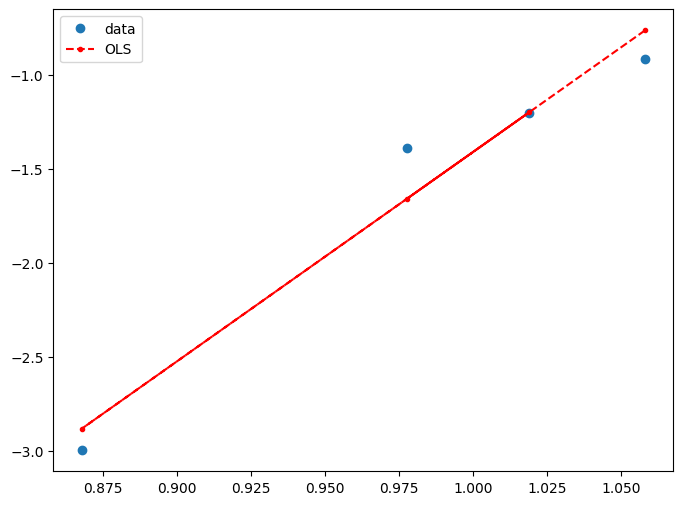

###################################


In [57]:
# 4.フレシェ分布のパラメータ-𝜖の推定
model.estimate_epsilon('OLS')

In [58]:
# 5.基準均衡時の内生変数をもとに、外生変数の推定
model.recover_fundamentals()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00018517904524770358
       x: [ 1.325e+00  6.459e-01  8.513e-01  1.157e+00]
     nit: 6
     jac: [ 3.858e-04 -7.944e-04  2.189e-04 -1.611e-04]
    nfev: 31
    njev: 6
### Check the estimation result ###
utility
[[ 52933.22018013  47949.94931291]
 [ 27210.19837528 129566.36823209]]
XE
[[1.1282647  1.53298808]
 [0.54983955 0.74707422]]
λ_ij
[[0.24377967 0.3000441 ]
 [0.06106971 0.39510652]]
Σλ_ij
0.9999999999999999
###################################
### Check the estimated variables ###
A_j: 就業地の生産レベル
[1.7167978  1.85990903]
xi_i: 地域iにおける商業地の相対地価
[1.66666667 1.36363636]
H_W_j: 商業地面積
[ 4.84169884 12.51987281]
H_i: 床面積
[20.01698842 23.61800838]
q_ave_i:  居住地の平均価格
[1.04512769 1.31203943]
φ_i: 土地賦存量に対する床面積の割合
[0.83125999 0.49573412]
H_ave_i: 床面積の最大量
[118.62621598  46.83641992]
#####################################


In [41]:
# 6.外生変数の再入力
new_exog = {
    't_ij': np.array([
        [45, 60],
        [60, 15]
    ])/(60*24),
    'tau_ij': np.array([
        [0.006, 0.009],
        [0.009, 0.004]
    ])
}
model.change_exog(new_exog)

In [42]:
# 7.新しい外生変数による一般均衡分析と, 内生変数の導出
model.solve_equilibrium('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [-2.694e-11 -8.146e-12]
       x: [ 9.529e-01  1.043e+00]
  method: hybr
    nfev: 13
    fjac: [[-9.595e-01  2.816e-01]
           [-2.816e-01 -9.595e-01]]
       r: [-4.207e+02  1.331e+02 -2.954e+02]
     qtf: [ 5.616e-08  3.640e-08]
w_j: 賃金率
[0.95293094 1.04281684]
#######################################
### Check the endogenous variables ###
λ_ij: 通勤割合
[[0.26550512 0.30050508]
 [0.0839439  0.3500459 ]]
q_i: 居住用地価
[0.88897842 1.1306228 ]
Q_j: 業務用地価
[1.4816307  1.54175836]
N_R_i: 居住人口
[56.60102072 43.39897928]
N_W_j: 勤務人口
[34.94490189 65.05509811]
M_R_i: 労働供給量
[57.35960678 46.58121471]
M_W_j: 労働需要量
[35.70348796 68.23733354]
H_R_i: 居住地面積
[16.00898022 10.52358958]
H_W_j: 商業地面積
[ 5.74079598 11.53861762]
H_i: 床面積
[21.74977621 22.0622072 ]
#####################################
